#**<혼자 공부하는 머신러닝 딥러닝>** 
코랩으로 공부



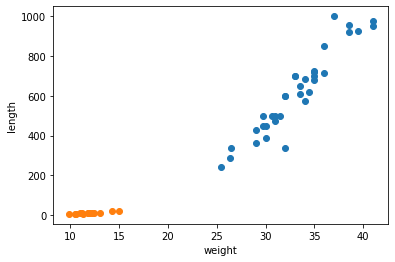

In [ ]:
import matplotlib.pyplot as plt

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

plt.scatter(bream_length,bream_weight)

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

plt.scatter(smelt_length,smelt_weight)
plt.ylabel("length")
plt.xlabel("weight")
plt.show()
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

fish_data = [ [i,j] for i,j in zip(length,weight)] #도미 + 빙어 무게 길이 짝
fish_target = [1]*35 + [0]*14

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)
kn.score(fish_data,fish_target)

kn.predict([ [300,400],[10,16] ])
print(kn._fit_X)
print(kn._y)

>**거리같은경우 어떻게 분류?**

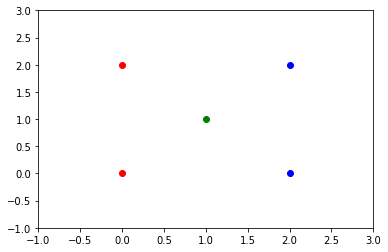

array([0])

In [ ]:
import matplotlib.pyplot as plt

data_0 = [[0,0],
          [0,2]]
data_1 = [[2,0],
          [2,2]]
x_0 = list(zip(*data_0))[0] #0,0
y_0 = list(zip(*data_0))[1] #0,2

x_1 = list(zip(*data_1))[0] #2,2
y_1 = list(zip(*data_1))[1] #0,2

# list(zip(*data_1))  <= 이건 [(2,2), (0,2)]된다

plt.plot(x_0,y_0,'ro')
plt.plot(x_1,y_1,'bo')
plt.axis([-1,3,-1,3])
plt.plot(1,1,'go')
plt.show()

data_ans = [0]*2 + [1]*2
testkn = KNeighborsClassifier(n_neighbors=1)

testkn.fit(data_0 + data_1,data_ans)
testkn.predict([[1,1]])



In [ ]:
# 기본의 K-Nearest 알고리즘은 주변 데이터 n=5인경우만 확인한다
# n=49개인경우 주변 49개 데이터 확인하고 가장 많은 것 선택
# 도미가 35개고 빙어는 14개라서 무조건 도미 선택한다.

kn49 = KNeighborsClassifier(n_neighbors=49)
kn49.fit(fish_data,fish_target)
kn49.score(fish_data,fish_target)

0.7142857142857143

**연습문제**

In [ ]:
kn = KNeighborsClassifier()
kn.fit(fish_data,fish_target)

for n in range(5,50):
  kn.n_neighbors=n
  score = kn.score(fish_data,fish_target)
  if score < 1:
    print(n,score)
  